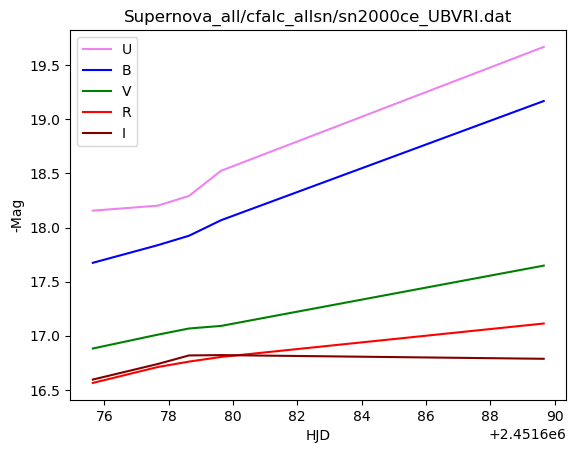

Supernova_all/cfalc_allsn/sn1994ae_UBVRI.dat ignored


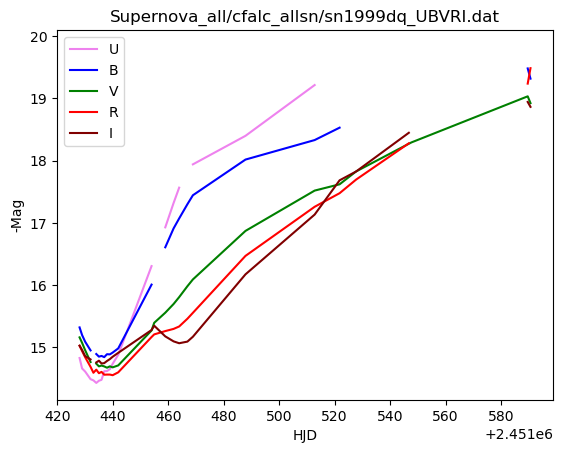

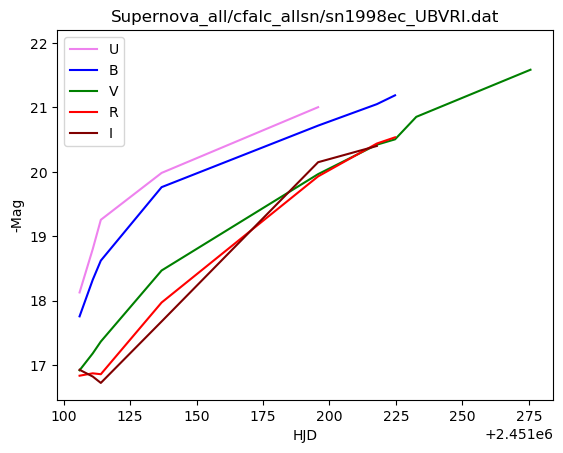

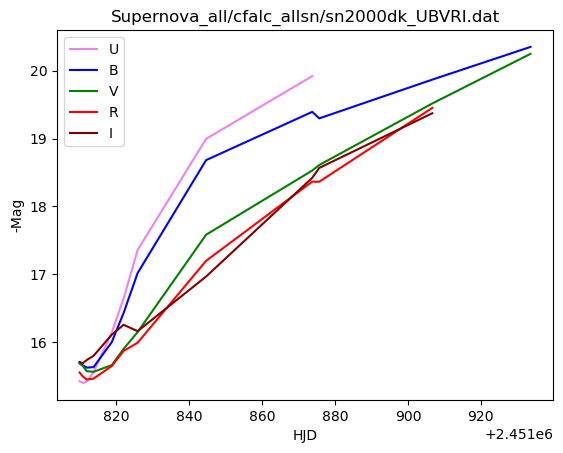

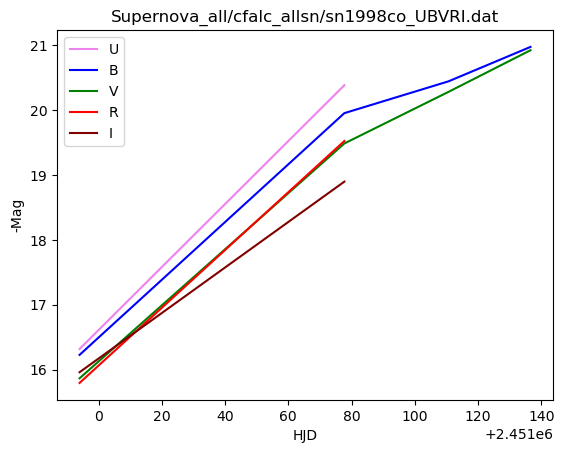

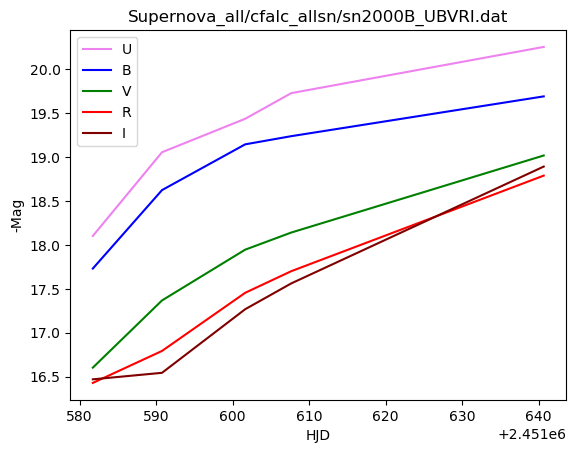

Supernova_all/cfalc_allsn/sn1998bu_UBVRI.dat ignored


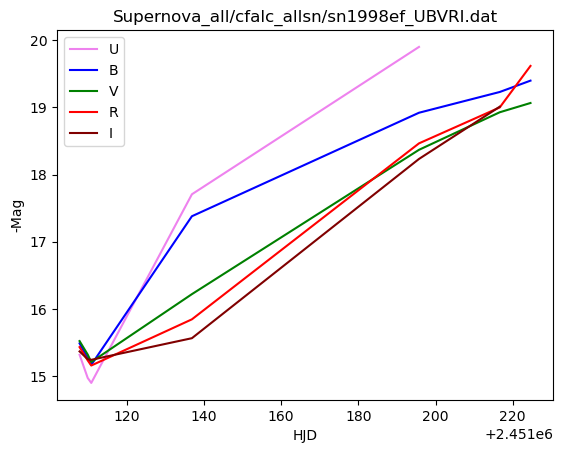

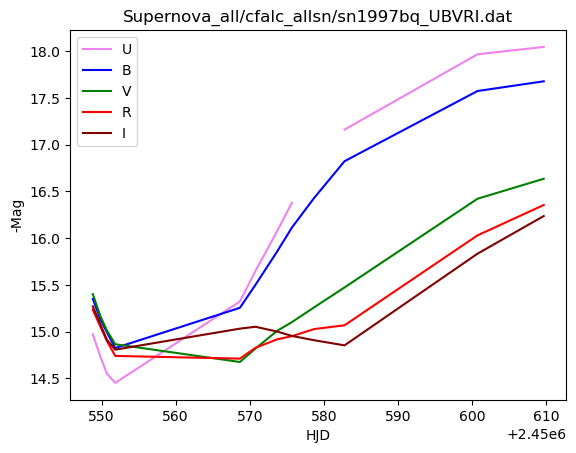

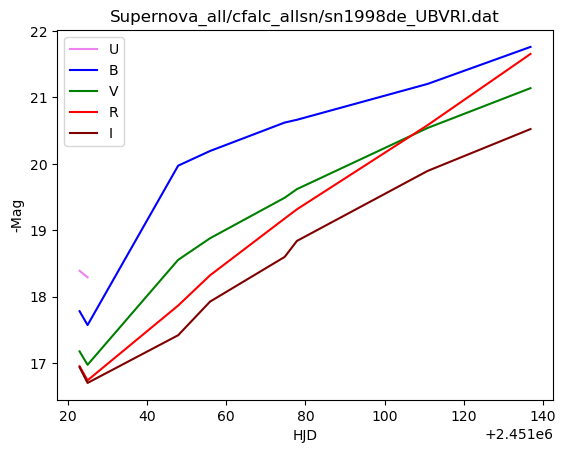

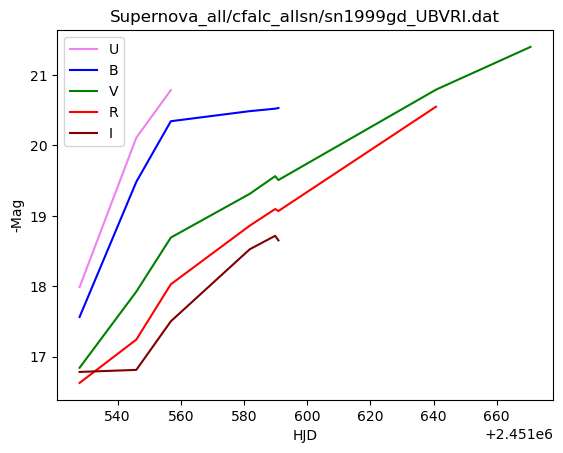

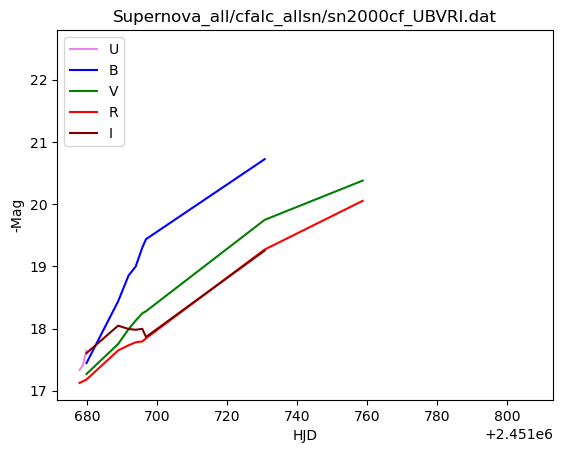

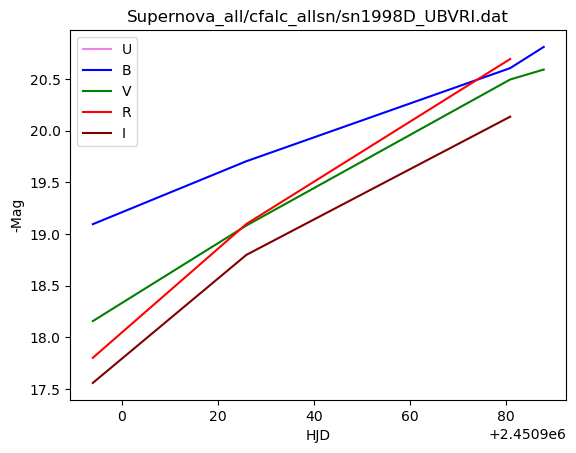

Supernova_all/cfalc_allsn/sn1998aq_UBVRI.dat ignored


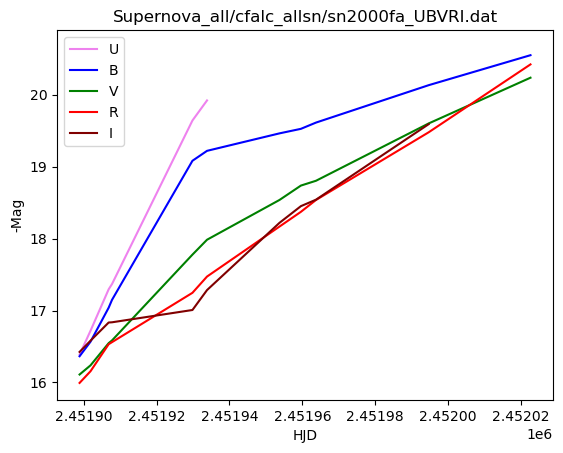

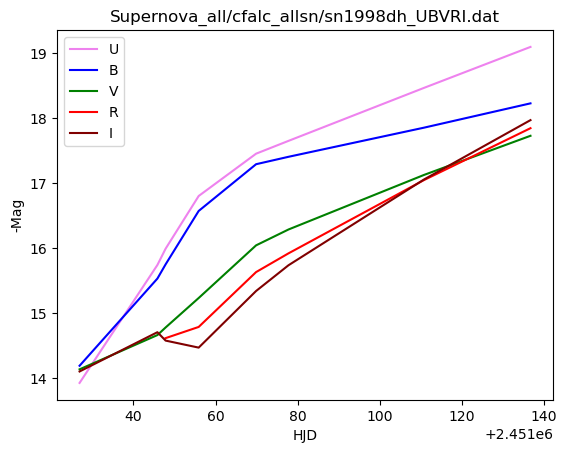

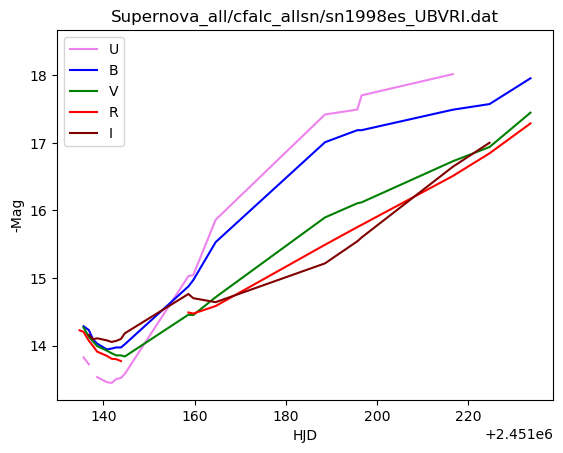

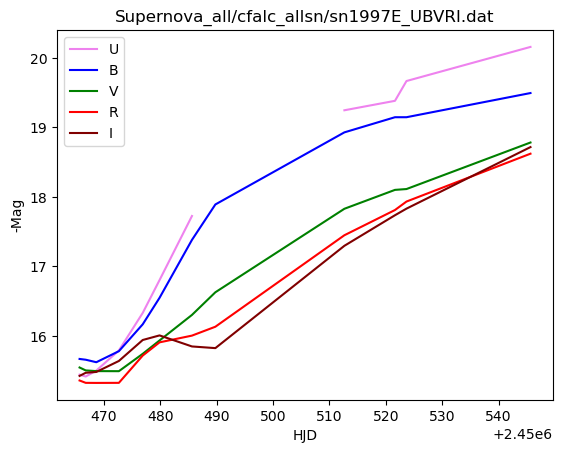

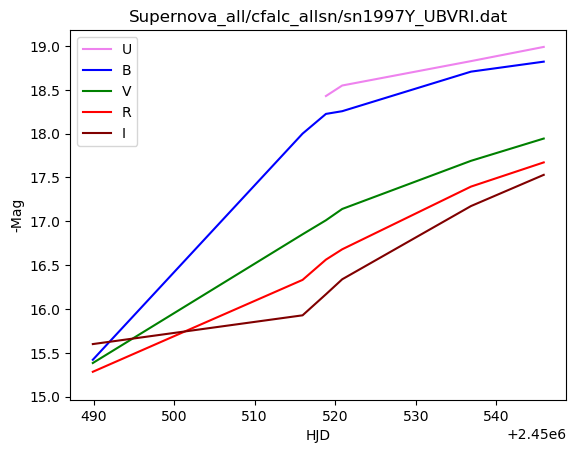

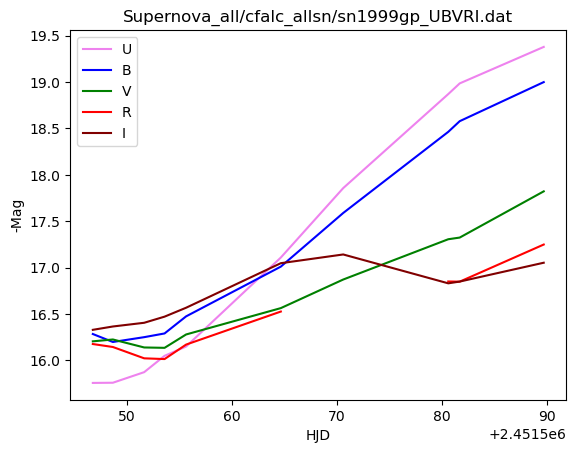

Supernova_all/cfalc_allsn/sn1999by_UBVRI.dat ignored


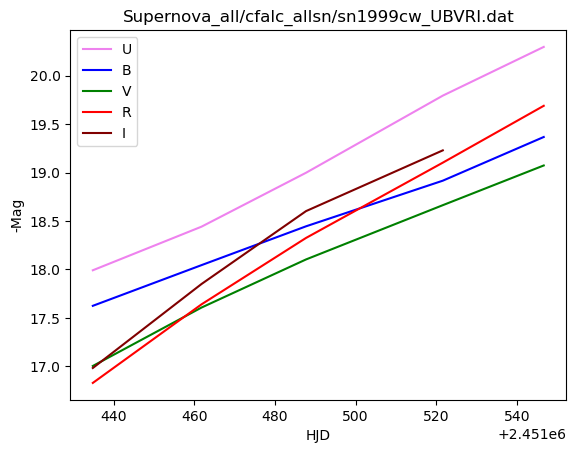

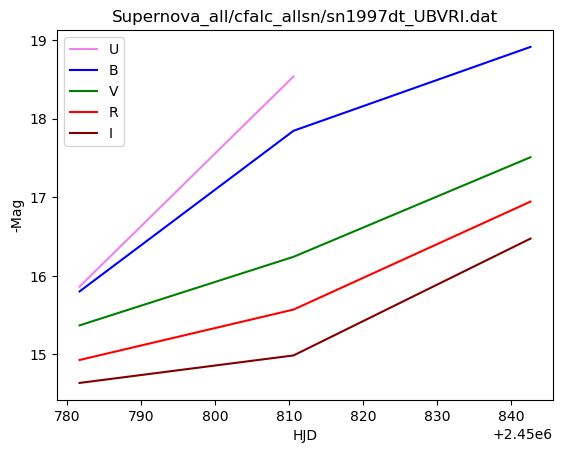

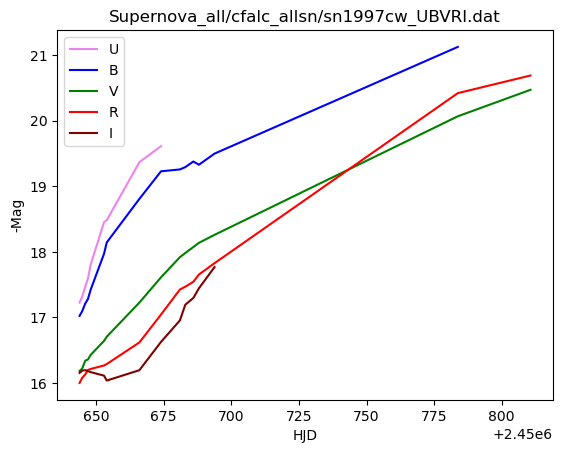

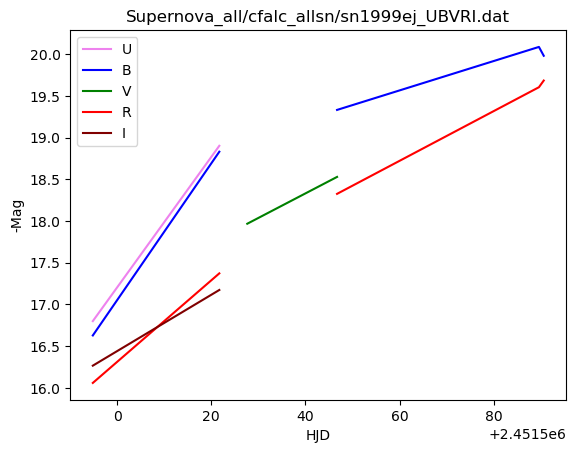

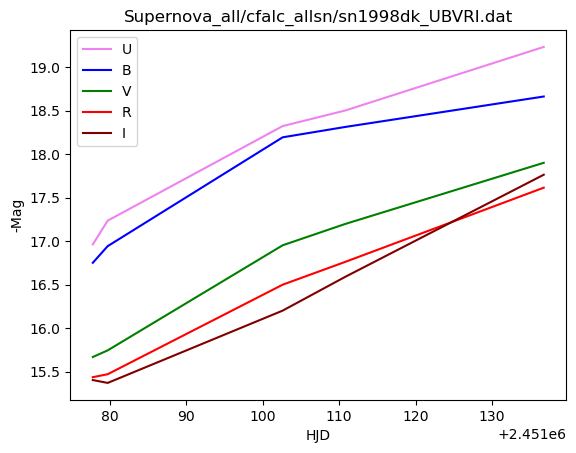

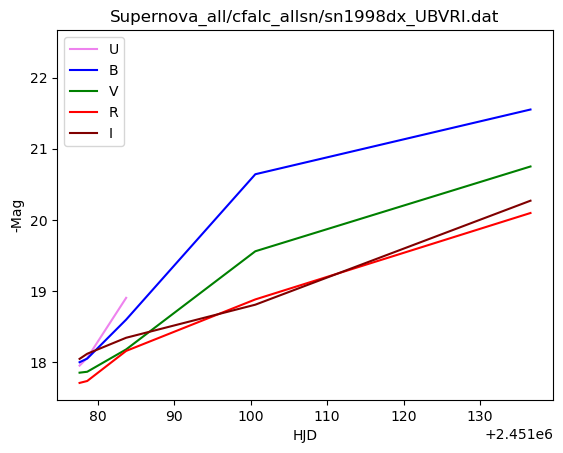

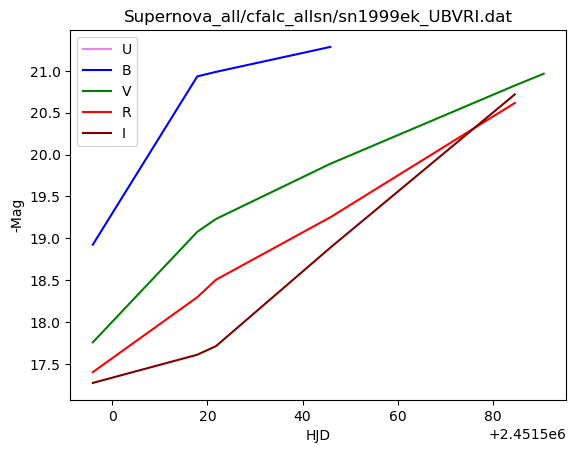

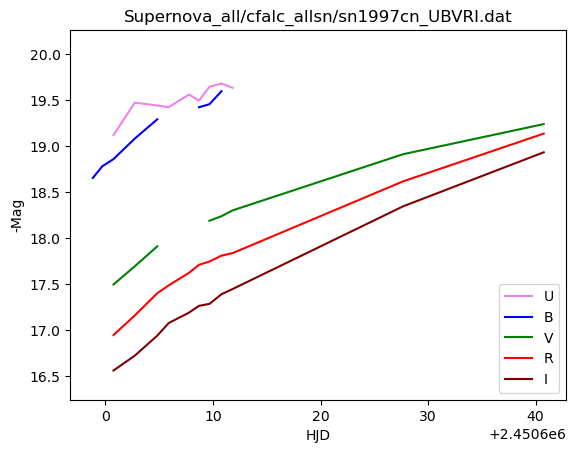

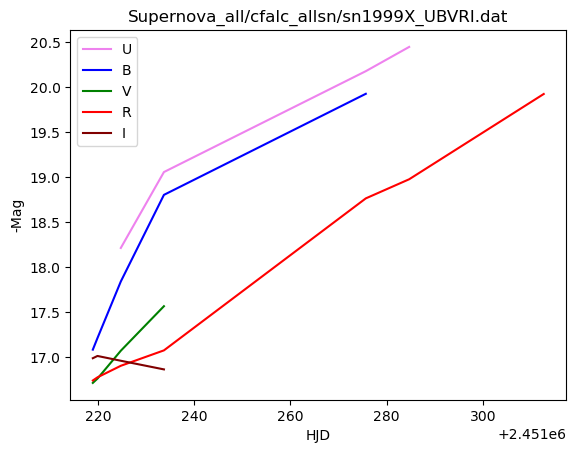

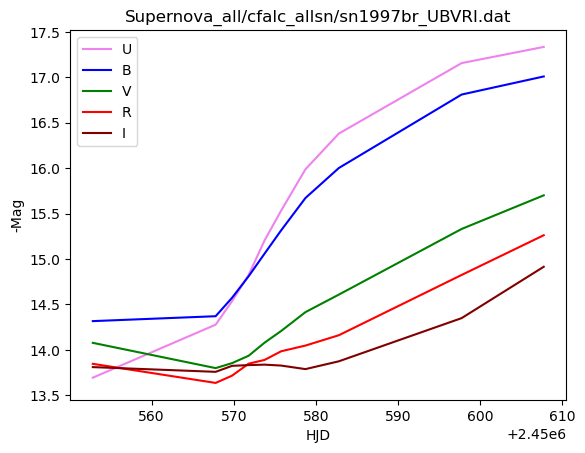

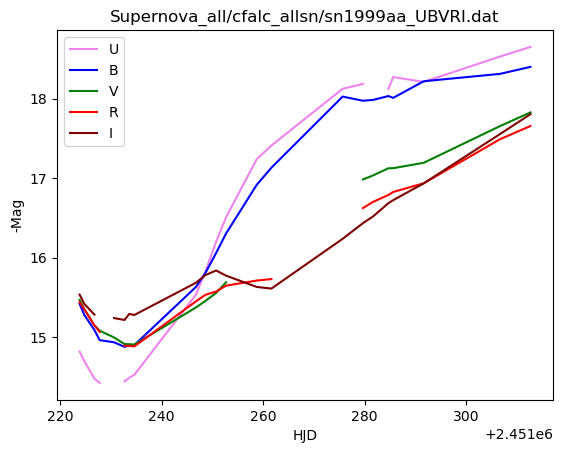

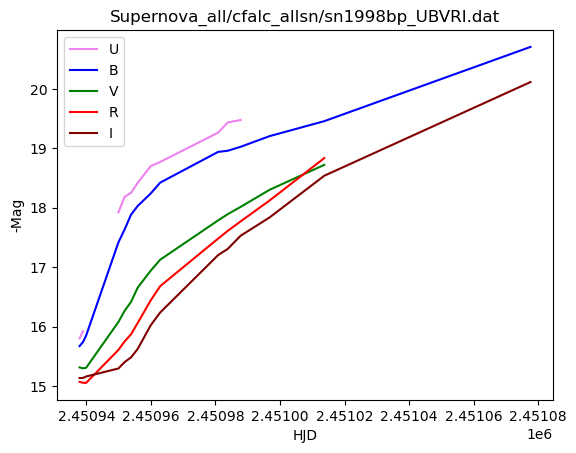

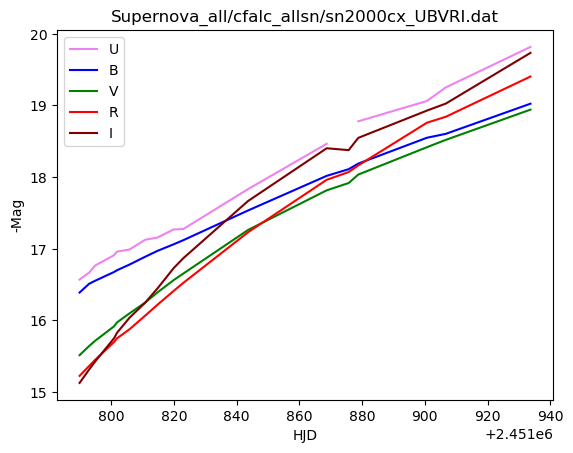

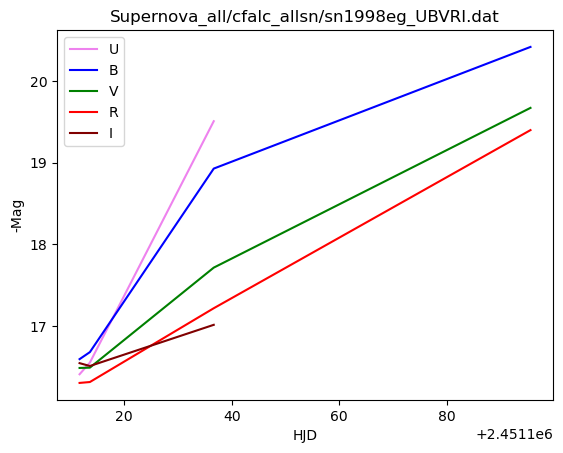

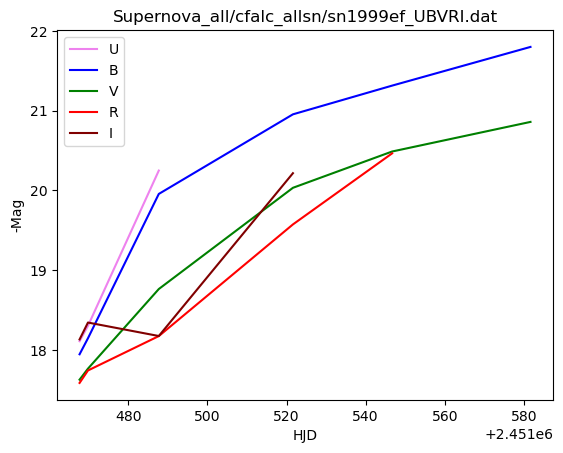

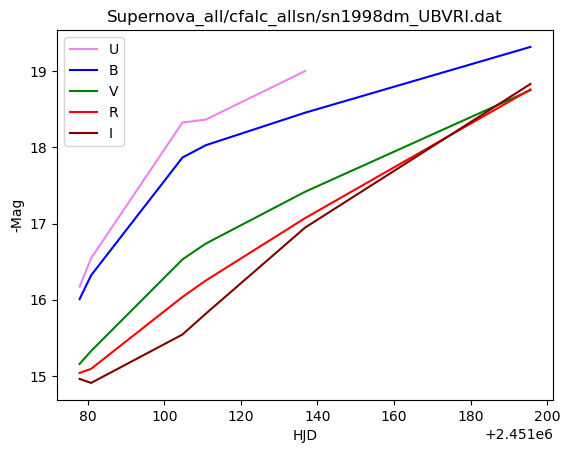

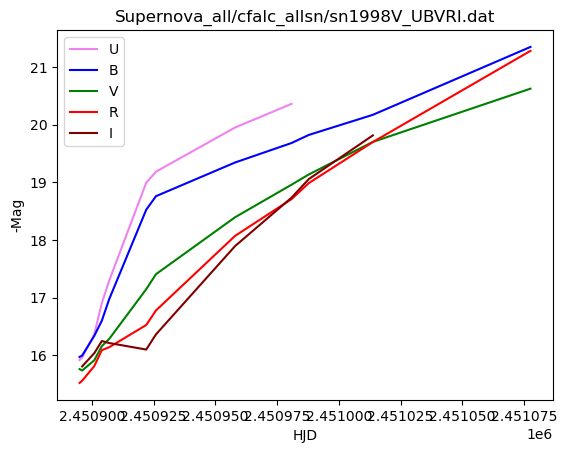

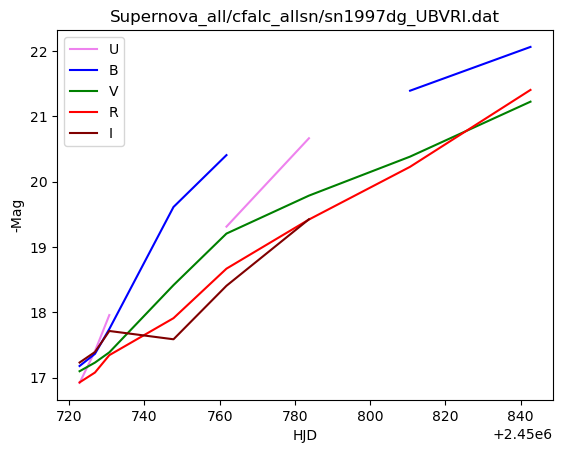

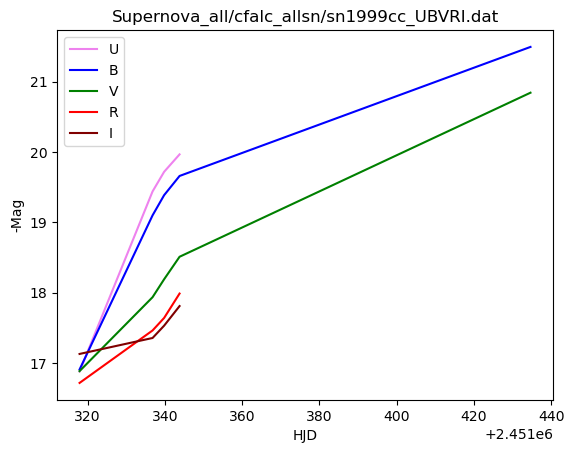

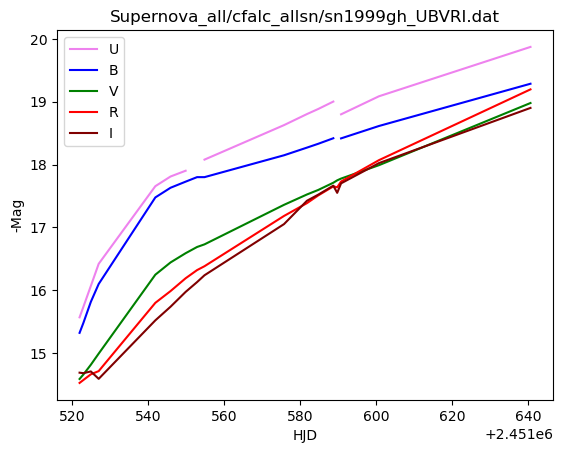

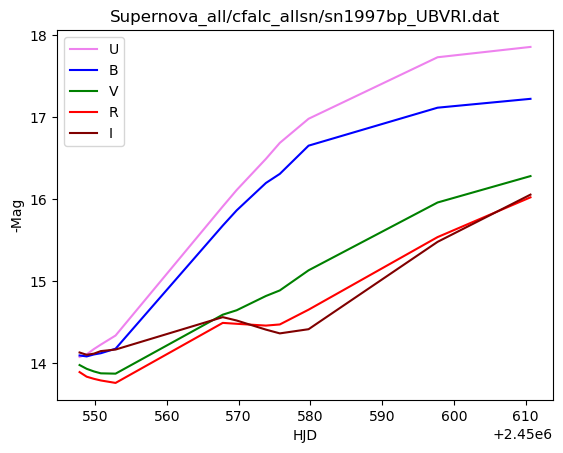

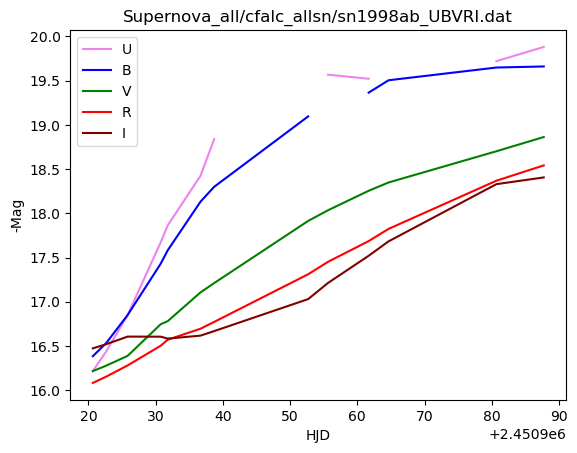

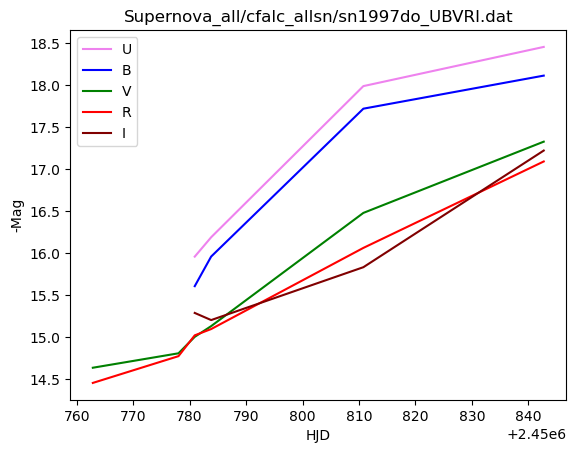

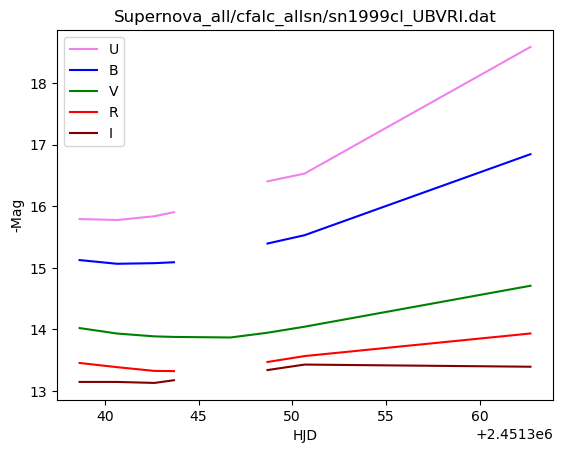

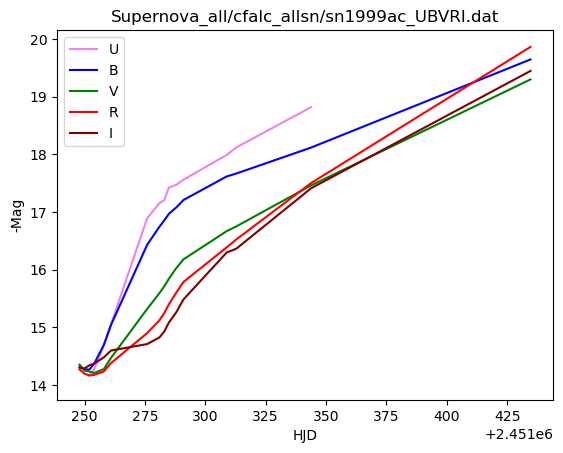

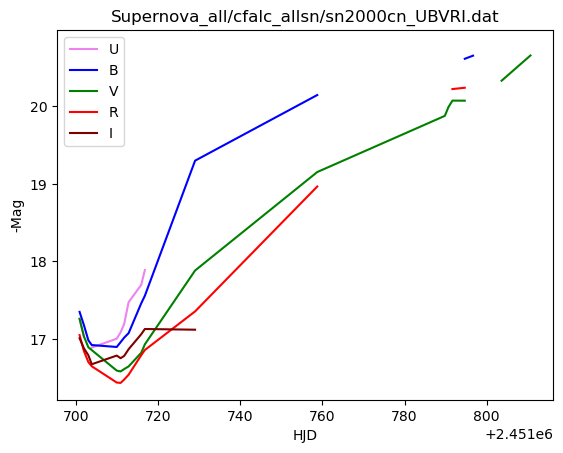

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
# from PyAstronomy import pyas

for file in glob.glob( "Supernova_all/cfalc_allsn/*_UBVRI.dat" ):
  try:
    df= pd.read_table( file, comment="#", sep="[ ]+", engine="python", header=0, names=["HDJ","U","Uerr","B","Berr","V","Verr","R","Rerr","I","Ierr"] )
    df[df == 99.999]= float( "NaN" )
    for filter, color in [["U","violet"],["B","blue"],["V","green"],["R","red"],["I","#800000"]]:
      plt.plot( df["HDJ"].values, df[filter].values, label=filter, color=color )
    plt.title( file )
    plt.xlabel( "HJD" )
    plt.ylabel( "-Mag" )
    plt.legend()
    plt.show()
  except:
    print( file, "ignored" )
